In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

## Trabalhando apenas com voos de SBRF(Recife) para SBSP(Congonhas)

Carregando arquivo 'flights_sbrf_to_sbsp.csv' previamente tratado e abrindo para verificar integridade.

endereço do arquivo: https://github.com/pedrooliveirape/dio-projeto-covid-machine-learning/blob/main/preco_passagens_sbrf_sbsp/flights_sbrf_to_sbsp.csv

In [ ]:
from google.colab import files
arq = files.upload()

Saving flights_sbrf_to_sbsp.csv to flights_sbrf_to_sbsp.csv


In [ ]:
df = pd.read_csv('flights_sbrf_to_sbsp.csv')

In [ ]:
df

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
0,2017,8,AZU,SBRF,SBSP,"630,9",1
1,2017,8,AZU,SBRF,SBSP,"937,46",1
2,2017,8,AZU,SBRF,SBSP,"690,71",1
3,2017,8,AZU,SBRF,SBSP,"319,51",1
4,2017,8,AZU,SBRF,SBSP,"399,4",2
...,...,...,...,...,...,...,...
41167,2022,7,TAM,SBRF,SBSP,"857,07",1
41168,2022,7,TAM,SBRF,SBSP,"584,",1
41169,2022,7,TAM,SBRF,SBSP,"1124,9",2
41170,2022,7,TAM,SBRF,SBSP,"961,",1


Verificando se hveria dados nulos ou fantantes e os tipos dos dados:

In [ ]:
df.isnull().sum()

ANO         0
MES         0
EMPRESA     0
ORIGEM      0
DESTINO     0
TARIFA      0
ASSENTOS    0
dtype: int64

In [ ]:
df.dtypes

ANO          int64
MES          int64
EMPRESA     object
ORIGEM      object
DESTINO     object
TARIFA      object
ASSENTOS     int64
dtype: object

Usando o replace para alterar a vírgula no valor da tarifa por pontos e depois alterando seu tipo de object para float:

In [ ]:
tarifas = df['TARIFA']
for i in range(len(tarifas)):
    df['TARIFA'][i] = df['TARIFA'][i].replace(',','.')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
0,2017,8,AZU,SBRF,SBSP,630.9,1
1,2017,8,AZU,SBRF,SBSP,937.46,1
2,2017,8,AZU,SBRF,SBSP,690.71,1
3,2017,8,AZU,SBRF,SBSP,319.51,1
4,2017,8,AZU,SBRF,SBSP,399.4,2
...,...,...,...,...,...,...,...
41167,2022,7,TAM,SBRF,SBSP,857.07,1
41168,2022,7,TAM,SBRF,SBSP,584.,1
41169,2022,7,TAM,SBRF,SBSP,1124.9,2
41170,2022,7,TAM,SBRF,SBSP,961.,1


Alterando o tipo de dado de TARIFA para float:

In [ ]:
df.TARIFA = df.TARIFA.astype(float)
print(df.dtypes)

ANO           int64
MES           int64
EMPRESA      object
ORIGEM       object
DESTINO      object
TARIFA      float64
ASSENTOS      int64
dtype: object


Deixando o título das colunas todos em minúsculos e alterando o nome da coluna 'tarifa' para 'preço de passagens' e a coluna 'assentos' para 'assentos vendidos':

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.rename(columns={'tarifa':'precopassagem','assentos':'assentosvendidos'}, inplace=True)
df

,ano,mes,empresa,origem,destino,precopassagem,assentosvendidos
0,2017,8,AZU,SBRF,SBSP,630.90,1
1,2017,8,AZU,SBRF,SBSP,937.46,1
2,2017,8,AZU,SBRF,SBSP,690.71,1
3,2017,8,AZU,SBRF,SBSP,319.51,1
4,2017,8,AZU,SBRF,SBSP,399.40,2
...,...,...,...,...,...,...,...
41167,2022,7,TAM,SBRF,SBSP,857.07,1
41168,2022,7,TAM,SBRF,SBSP,584.00,1
41169,2022,7,TAM,SBRF,SBSP,1124.90,2
41170,2022,7,TAM,SBRF,SBSP,961.00,1


Adicionando uma coluna data a partir das colunas ano e mês:

In [ ]:
df['data'] = ''
for i in range(len(df)):
    if df['mes'][i] < 10:
        df['data'][i] = f"{df['ano'][i]}-0{df['mes'][i]}-01"
    else:
        df['data'][i] = f"{df['ano'][i]}-{df['mes'][i]}-01"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Modificando o tipo da coluna data para datetime64:

In [ ]:
df['data'] = pd.to_datetime(df['data'])
print(df.dtypes)

ano                          int64
mes                          int64
empresa                     object
origem                      object
destino                     object
precopassagem              float64
assentosvendidos             int64
data                datetime64[ns]
dtype: object


In [ ]:
df

,ano,mes,empresa,origem,destino,precopassagem,assentosvendidos,data
0,2017,8,AZU,SBRF,SBSP,630.90,1,2017-08-01
1,2017,8,AZU,SBRF,SBSP,937.46,1,2017-08-01
2,2017,8,AZU,SBRF,SBSP,690.71,1,2017-08-01
3,2017,8,AZU,SBRF,SBSP,319.51,1,2017-08-01
4,2017,8,AZU,SBRF,SBSP,399.40,2,2017-08-01
...,...,...,...,...,...,...,...,...
41167,2022,7,TAM,SBRF,SBSP,857.07,1,2022-07-01
41168,2022,7,TAM,SBRF,SBSP,584.00,1,2022-07-01
41169,2022,7,TAM,SBRF,SBSP,1124.90,2,2022-07-01
41170,2022,7,TAM,SBRF,SBSP,961.00,1,2022-07-01


Adicionando a coluna 'receita de passagens' a partir da multiplicação da coluna 'precopassagens' com a coluna 'assentosvendidos':

In [ ]:
df['receitapassagens'] = ''
for i in range(len(df)):
    df['receitapassagens'][i] = df['precopassagem'][i]*df['assentosvendidos'][i]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ano,mes,empresa,origem,destino,precopassagem,assentosvendidos,data,receitapassagens
0,2017,8,AZU,SBRF,SBSP,630.90,1,2017-08-01,630.9
1,2017,8,AZU,SBRF,SBSP,937.46,1,2017-08-01,937.46
2,2017,8,AZU,SBRF,SBSP,690.71,1,2017-08-01,690.71
3,2017,8,AZU,SBRF,SBSP,319.51,1,2017-08-01,319.51
4,2017,8,AZU,SBRF,SBSP,399.40,2,2017-08-01,798.8
...,...,...,...,...,...,...,...,...,...
41167,2022,7,TAM,SBRF,SBSP,857.07,1,2022-07-01,857.07
41168,2022,7,TAM,SBRF,SBSP,584.00,1,2022-07-01,584.0
41169,2022,7,TAM,SBRF,SBSP,1124.90,2,2022-07-01,2249.8
41170,2022,7,TAM,SBRF,SBSP,961.00,1,2022-07-01,961.0


Alterando o tipo de dado de receitaspassagens para float:

In [ ]:
df.receitapassagens = df.receitapassagens.astype(float)
print(df.dtypes)

ano                          int64
mes                          int64
empresa                     object
origem                      object
destino                     object
precopassagem              float64
assentosvendidos             int64
data                datetime64[ns]
receitapassagens           float64
dtype: object


Somando um groupby de 'data' e adicionando a um DataFrame 'df_mes' apenas as colunas que não fazem sentido serem somadas:

In [ ]:
df_mes = df.groupby('data').sum()

In [ ]:
df_mes.drop(['ano','mes','precopassagem'], axis=1, inplace=True)
df_mes.reset_index(inplace=True)

In [ ]:
df_mes.head()

,ano,mes,precopassagem,assentosvendidos,receitapassagens
data,,,,,
2017-08-01,641406,2544,174720.60,8900,3534444.50
2017-09-01,873361,3897,239323.95,9015,3667510.71
2017-10-01,897565,4450,262390.54,9496,4068539.88
2017-11-01,734188,4004,206055.28,9575,3873710.01
2017-12-01,621236,3696,179468.00,7016,3118397.67


Criando uma coluna para calcular o preço médio das passagens por mês dividindo o a receita mensal de passagens pelo número de assentos vendidos ('receitapassagens'/'assentosvendidos'):

In [ ]:
df_mes['precomediopassagens'] = ''
for c in range(len(df_mes)):
    df_mes['precomediopassagens'][c] = df_mes['receitapassagens'][c]/df_mes['assentosvendidos'][c]
df_mes['precomediopassagens'] = pd.to_numeric(df_mes['precomediopassagens'])
def_mes = round(df_mes["precomediopassagens"], 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_mes.head()

,ano,mes,precopassagem,assentosvendidos,receitapassagens,precomediopassagens
data,,,,,,
2017-08-01,641406,2544,174720.60,8900,3534444.50,397.128596
2017-09-01,873361,3897,239323.95,9015,3667510.71,406.823151
2017-10-01,897565,4450,262390.54,9496,4068539.88,428.447755
2017-11-01,734188,4004,206055.28,9575,3873710.01,404.565014
2017-12-01,621236,3696,179468.00,7016,3118397.67,444.469451


Utilizando o decribe() para verificar algumas informações estatísticas. É possível observar pelo count que a quantidade de meses é exatamente a esperada de 60 períodos.

In [ ]:
df_mes['precomediopassagens'].describe()

count     60.000000
mean     475.877533
std      120.000466
min      244.966320
25%      396.835122
50%      464.419891
75%      550.585877
max      708.260051
Name: precomediopassagens, dtype: float64

### Gráfico da evolução da venda de passagens de SBRF para SBSP:

In [ ]:
px.line(df_mes, df_mes.index, 'precomediopassagens', title='Quantidade de passagens vendidas de SBRF para SBSP')

### Gráfico da evolução da receita de venda de passagens de SBRF para SBSP:

In [ ]:
px.line(df_mes, df_mes.index, 'receitapassagens', title='Receita da venda de passagens de SBRF para SBSP')

### Gráfico da evolução do preço médio de passagens de SBRF para SBSP:

In [ ]:
px.line(df_mes, df_mes.index, 'precomediopassagens', title='Preço médio das passagens de SBRF para SBSP')

### Fazendo predições

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
media_precos = df_mes.precomediopassagens
media_precos.index = df_mes.index
media_precos.head()

data
2017-08-01    397.128596
2017-09-01    406.823151
2017-10-01    428.447755
2017-11-01    404.565014
2017-12-01    444.469451
Name: precomediopassagens, dtype: float64

Fazendo a decomposição:

In [ ]:
resultado = seasonal_decompose(media_precos)

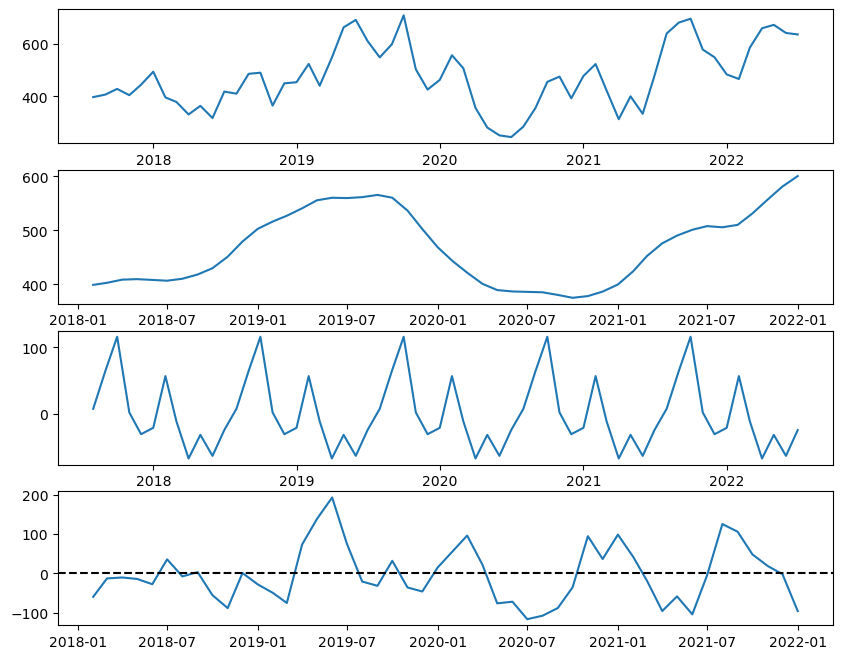

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))
ax1.plot(resultado.observed)
ax2.plot(resultado.trend)
ax3.plot(resultado.seasonal)
ax4.plot(media_precos.index, resultado.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

#### Utilizando plotly.graph_objects

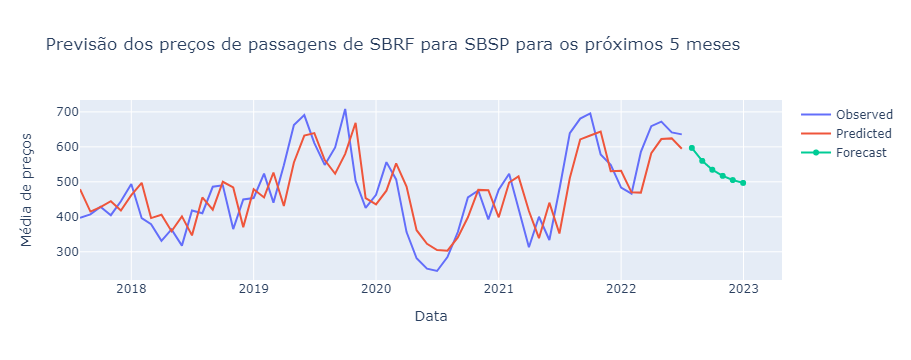

In [ ]:
fig = go.Figure(go.Scatter(
    x=media_precos.index, y=media_precos, name='Observed'
))

fig.add_trace(go.Scatter(x=media_precos.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2022-07-01', '2022-12-31', freq='1M'), y=modelo.predict(n_periods=6), name='Forecast'))

fig.update_layout(title='Previsão dos preços de passagens de SBRF para SBSP para os próximos 5 meses',
                 yaxis_title='Média de preços', xaxis_title='Data')
fig.show()

### Forecasting com Facebook Prophet

In [ ]:
pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 136 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638385 sha256=829435356fd23417f20b0147eda3d044dfcd571c35fb9fe1f8338a5de29560b1
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [ ]:
from fbprophet import Prophet

In [ ]:
# preparando os dados
train = media_precos.reset_index()[:-4]
test = media_precos.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"data":"ds","precomediopassagens":"y"},inplace=True)
test.rename(columns={"data":"ds","precomediopassagens":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet()

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=10, freq='1M')
forecast =  profeta.predict(future_dates)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()